Sejak 2008, para tamu dan tuan rumah telah menggunakan Airbnb untuk memperluas kemungkinan perjalanan dan menghadirkan cara yang lebih unik dan personal untuk mengalami dunia. Saat ini, Airbnb menjadi salah satu layanan sejenis yang digunakan dan diakui oleh seluruh dunia. Analisis data pada jutaan cantuman yang disediakan melalui Airbnb adalah faktor penting bagi perusahaan. Jutaan cantuman ini menghasilkan banyak data - data yang dapat dianalisis dan digunakan untuk keamanan, keputusan bisnis, pemahaman perilaku dan kinerja pelanggan (penyedia) dan penyedia di platform, memandu prakarsa pemasaran, penerapan layanan tambahan yang inovatif dan lebih banyak.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [41]:
airbnb = pd.read_csv("../Datasets/NYC airbnb/AB_NYC_2019.csv")

In [42]:
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [43]:
len(airbnb)

48895

In [44]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [45]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Setelah memuat dataset dalam dan dari kepala dataset AB_2019_NYC kita dapat melihat sejumlah hal. Ke 16 kolom ini menyediakan sejumlah besar informasi untuk eksplorasi data mendalam yang dapat kita lakukan pada dataset ini. Kami sudah melihat beberapa nilai yang hilang, yang akan membutuhkan pembersihan dan penanganan nilai NaN. Kemudian, kita mungkin perlu melanjutkan pemetaan nilai-nilai tertentu ke nol dan satu untuk analitik prediktif.

# Understadning, Wrangling and Cleaning Data

Dalam kasus kita, data yang hilang yang diamati tidak perlu terlalu banyak perlakuan khusus. Melihat sifat dataset kami, kami dapat menyatakan hal-hal lebih lanjut: kolom "nama" dan "host_name" tidak relevan dan tidak signifikan untuk analisis data kami, kolom "last_review" dan "review_per_month" memerlukan penanganan yang sangat sederhana. Untuk uraiannya, "last_review" adalah tanggal; jika tidak ada ulasan untuk cantuman - tanggal, tidak akan ada. Dalam kasus kami, kolom ini tidak relevan dan tidak signifikan karena itu menambahkan nilai-nilai itu tidak diperlukan. Untuk kolom "review_per_month" kita cukup menambahkannya dengan 0,0 untuk nilai yang hilang; kita dapat melihat bahwa di "number_of_review" kolom itu akan memiliki 0, oleh karena itu dengan mengikuti logika ini dengan 0 ulasan total akan ada 0,0 tingkat ulasan per bulan. Karena itu, mari kita lanjutkan dengan menghapus kolom yang tidak penting dan menangani data yang hilang.

In [46]:
airbnb.drop(['id', 'host_name', 'last_review'], axis = 1, inplace = True)
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [47]:
airbnb.fillna({'reviews_per_month': 0}, inplace = True)
airbnb.reviews_per_month.isnull().sum()

0

In [48]:
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Harap perhatikan bahwa kami menjatuhkan 'host_name' tidak hanya karena tidak signifikan tetapi juga karena alasan etis. Seharusnya tidak ada alasan untuk melanjutkan eksplorasi data dan pelatihan model (yang akan kita lakukan nanti) terhadap individu tertentu berdasarkan nama mereka. Mengapa demikian? Nama-nama itu ditugaskan untuk manusia yang sebenarnya, juga mereka tidak menghadirkan ancaman keamanan atau kepentingan militer / pemerintah berdasarkan pada sifat dataset, oleh karena itu nama tidak penting bagi kami.

In [49]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [50]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [51]:
#examining the unique values of room_type as this column will appear very handy for later analysis
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Memahami nilai-nilai unik dan data kategoris yang kami miliki dalam dataset kami adalah langkah terakhir yang harus kami lakukan. Sepertinya untuk nilai kolom tersebut kami akan melakukan pemetaan untuk menyiapkan dataset untuk analisis prediktif.

# Exploring and Visualizing Data

Sekarang kami siap untuk eksplorasi data kami, kami dapat membuat aturan bahwa kami akan bekerja dari kiri ke kanan. Alasan beberapa orang lebih suka melakukan ini adalah karena pendekatan yang ditetapkan - beberapa dataset memiliki sejumlah besar atribut, ditambah dengan cara ini kita akan ingat untuk mengeksplorasi setiap kolom secara terpisah untuk memastikan kita belajar sebanyak mungkin tentang dataset kita.

In [52]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host = airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [53]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

327

In [54]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})

[Text(0,0,'219517861'),
 Text(0,0,'107434423'),
 Text(0,0,'30283594'),
 Text(0,0,'137358866'),
 Text(0,0,'12243051'),
 Text(0,0,'16098958'),
 Text(0,0,'61391963'),
 Text(0,0,'22541573'),
 Text(0,0,'200380610'),
 Text(0,0,'7503643')]

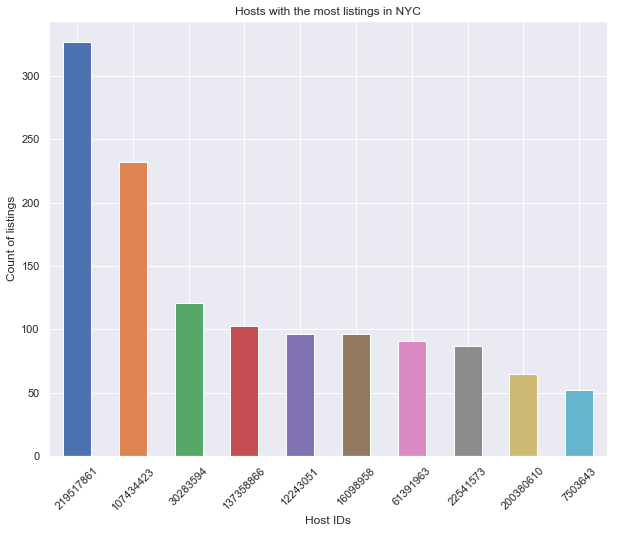

In [55]:
viz_1=top_host.plot(kind='bar')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Menarik, kita dapat melihat bahwa ada distribusi yang baik antara 10 host teratas dengan daftar terbanyak. Host pertama memiliki lebih dari 300 daftar.

In [56]:
#let's find out more about our neighbourhoods presented 'Brooklyn', 'Manhhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1 = airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1 = sub_1[['price']]

#Manhattan
sub_2 = airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2 = sub_2[['price']]

#Queens
sub_3 = airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3 = sub_3[['price']]

#Staten Island
sub_4 = airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4 = sub_4[['price']]

#Bronx
sub_5 = airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5 = sub_5[['price']]

price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [57]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2 = []

#creatin list wit known values in neighbourhood_group column
nei_list = ['Brooklyn', 'Manhattan', 'Queens', 'State Island', 'Bronx']

#creating a for loop to et statistics for prices ranges and append it to our empty list
for x in price_list_by_n:
    i = x.describe(percentiles=[.25, .50, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace = True)
    p_l_b_n_2.append(i)
    
#changing names of the price column to the area name for easier reading of the table
p_l_b_n_2[0].rename(columns={'price': nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price': nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price': nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price': nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price': nei_list[4]}, inplace=True)

#finilizing our dataframe for final view
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df = stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,State Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5,1,'Density and distribution of prices for each neighbourhood_group')

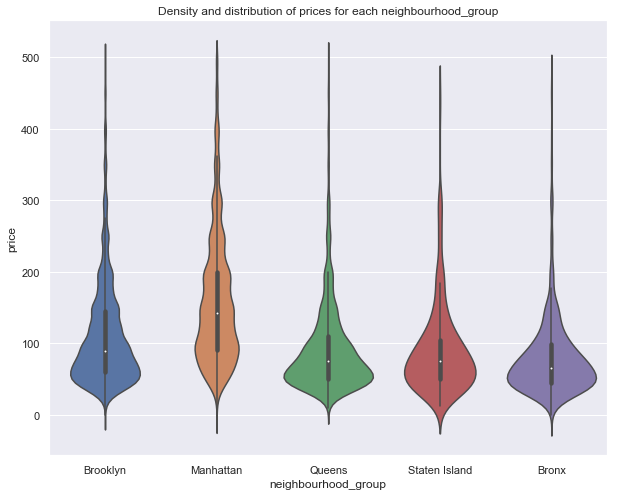

In [58]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=airbnb[airbnb.price < 500]
#using violinplot to showcase density and distribution of prices
viz_2=sns.violinplot(data = sub_6, x='neighbourhood_group', y = 'price')
viz_2.set_title('Density and distribution of prices for each neighbourhood_group')

Hebat, dengan tabel statistik dan violin plot, kami pasti dapat mengamati beberapa hal tentang distribusi harga untuk Airbnb di wilayah NYC. Pertama, kita dapat menyatakan bahwa Manhattan memiliki kisaran harga tertinggi untuk daftar dengan harga  150 dolar sebagai pengamatan rata-rata, diikuti oleh Brooklyn dengan  $ 90 per malam. Queens dan Staten Island tampaknya memiliki distribusi yang sangat mirip, Bronx adalah yang termurah dari semuanya. Distribusi dan kepadatan harga ini sepenuhnya diharapkan; misalnya, karena bukan rahasia lagi bahwa Manhattan adalah salah satu tempat termahal di dunia untuk ditinggali, di mana Bronx di sisi lain tampaknya memiliki standar hidup yang lebih rendah.

In [59]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

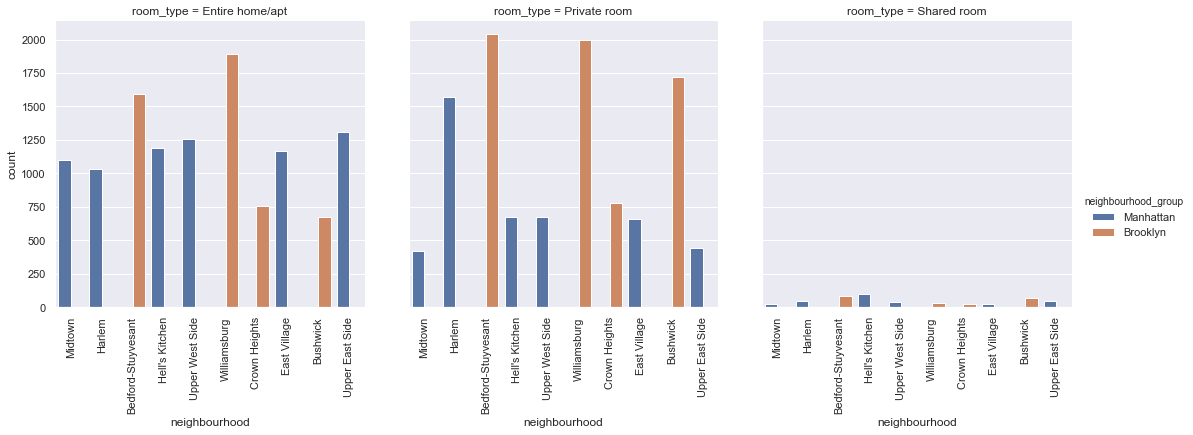

In [60]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7 = airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side', 'Hell\'s Kitchen', 'East Village', 'Upper East Side', 'Crown Heights', 'Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col = 'room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

Luar biasa, tapi mari kita uraikan apa yang bisa kita lihat dari plot ini. Pertama, kita dapat melihat bahwa plot kita terdiri dari 3 subplot - yaitu kekuatan menggunakan catplot; dengan output seperti itu, kita dapat dengan mudah melanjutkan dengan membandingkan distribusi di antara atribut yang menarik. Sumbu Y dan X tetap sama persis untuk setiap subplot, sumbu Y mewakili jumlah pengamatan dan pengamatan sumbu X yang ingin kami hitung. Namun, ada 2 elemen yang lebih penting: kolom dan hue; 2 subplot yang berbeda itu. Setelah kami menentukan kolom dan menentukan hue kami dapat mengamati dan membandingkan sumbu Y dan X kami di antara kolom yang ditentukan serta kode warna. Jadi, apa yang kita pelajari dari ini? Pengamatan yang paling kontras adalah bahwa jenis pemesanan Airbnb 'Kamar bersama' hampir tidak tersedia di antara 10 lingkungan yang paling padat penduduknya. Kemudian, kita dapat melihat bahwa untuk 10 lingkungan ini hanya 2 distrik yang diwakili: Manhattan dan Brooklyn; yang agak diharapkan karena Manhattan dan Brooklyn adalah salah satu tujuan paling banyak bepergian, oleh karena itu akan memiliki ketersediaan listing terbanyak. Kita juga dapat mengamati bahwa Bedford-Stuyvesant dan Williamsburg adalah yang paling populer di Manhattan, dan Harlem untuk Brooklyn.

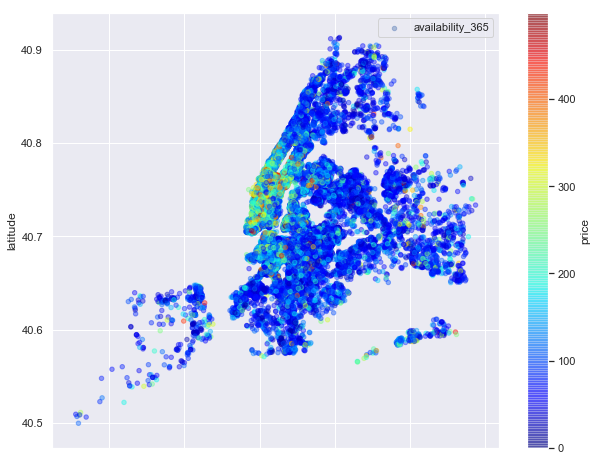

In [61]:
#let's what we can do with our given longitude and latitude columns

#let's see how scatterplot will come out
viz_4 = sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', cmap=plt.get_cmap('jet'), colorbar = True, alpha=0.4, figsize=(10,8))
viz_4.legend()

Bagus, scatterplot bekerja dengan baik untuk menampilkan titik lintang dan bujur kami. Namun, alangkah baiknya memiliki peta di bawah ini untuk peta panas yang sepenuhnya mendalam di tas kami - mari kita lihat apa yang bisa kita lakukan!

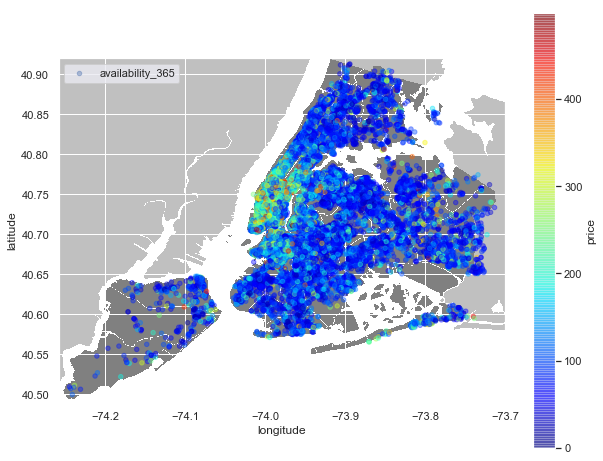

In [62]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

Fantastis! Setelah mengubah gambar kami sebaik mungkin, kami mengamati bahwa kami berakhir dengan peta panas yang sangat mendalam. Menggunakan titik lintang dan bujur dapat memvisualisasikan semua daftar NYC. Kami juga menambahkan rentang kode warna untuk setiap titik di peta berdasarkan harga daftar. Namun, penting untuk dicatat bahwa kami harus menjatuhkan beberapa nilai yang sangat tinggi karena dianggap sebagai pencilan untuk analisis kami.

In [63]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_ = []

#getting name strings from the column and appending it to the list
for name in airbnb.name:
    _names_.append(name)
    
#setting a function that will split those name strings into separate words
def split_name(name):
    spl=str(name).split()
    return spl

#initializing empty list where we are going to have words counted
_names_for_count_=[]

#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word = word.lower()
        _names_for_count_.append(word)

In [64]:
#we are going to use counter
from collections import Counter

#let's see top 25 used words by host to name their listening
_top_25_w = Counter(_names_for_count_).most_common()
_top_25_w = _top_25_w[0:25]

In [65]:
#now let's put our findings in dataframe for further visualizations
sub_w = pd.DataFrame(_top_25_w)
sub_w.rename(columns={0: 'Words', 1: 'Count'}, inplace = True)

[Text(0,0,'in'),
 Text(0,0,'room'),
 Text(0,0,'bedroom'),
 Text(0,0,'private'),
 Text(0,0,'apartment'),
 Text(0,0,'cozy'),
 Text(0,0,'the'),
 Text(0,0,'to'),
 Text(0,0,'studio'),
 Text(0,0,'brooklyn'),
 Text(0,0,'apt'),
 Text(0,0,'spacious'),
 Text(0,0,'1'),
 Text(0,0,'with'),
 Text(0,0,'2'),
 Text(0,0,'of'),
 Text(0,0,'east'),
 Text(0,0,'and'),
 Text(0,0,'manhattan'),
 Text(0,0,'&'),
 Text(0,0,'park'),
 Text(0,0,'sunny'),
 Text(0,0,'beautiful'),
 Text(0,0,'near'),
 Text(0,0,'williamsburg')]

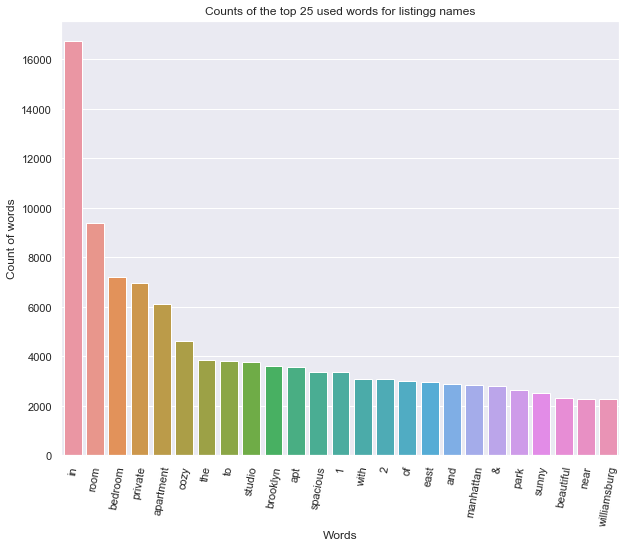

In [66]:
#we are going to use barplot for this visualization
viz_5 = sns.barplot(x='Words', y='Count', data = sub_w)
viz_5.set_title('Counts of the top 25 used words for listingg names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

Kita dapat mengamati bahwa mencari tahu dan melampaui 25 kata atas daftar nama bekas - kita dapat melihat satu tren yang jelas. Ini menunjukkan bahwa tuan rumah hanya menggambarkan daftar mereka dalam bentuk singkat dengan istilah yang sangat spesifik untuk pencarian yang lebih mudah oleh wisatawan yang potensial. Para pekerja seperti itu adalah 'kamar', 'kamar tidur', 'pribadi', 'apartemen', 'studio'. Ini menunjukkan bahwa tidak ada istilah slogannya atau istilah 'populer / tren' yang digunakan untuk nama; host menggunakan istilah yang sangat sederhana yang menggambarkan ruang dan area tempat listing. Teknik ini agak diharapkan karena berurusan dengan pelanggan multibahasa bisa rumit dan Anda pasti ingin menggambarkan ruang Anda dalam bentuk yang ringkas dan dipahami sebanyak mungkin.

In [67]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings = airbnb.nlargest(10, 'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [68]:
price_avrg = top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


 Tidak ada alasan untuk memvisualisasikan ini karena format tabel akan menjadi output yang paling cocok untuk bacaan yang lebih baik. Dari hasil tabel ini, kita dapat mengamati bahwa 10 listing paling banyak ditinjau di Airbnb untuk NYC memiliki rata-rata harga $ 65 dengan sebagian besar daftar di bawah \ $ 50, dan 9/10 di antaranya adalah tipe 'Kamar pribadi'; daftar teratas ditinjau memiliki 629 ulasan.Tidak ada alasan untuk memvisualisasikan ini karena format tabel akan menjadi output yang paling cocok untuk bacaan yang lebih baik. Dari hasil tabel ini, kita dapat mengamati bahwa 10 listing paling banyak ditinjau di Airbnb untuk NYC memiliki rata-rata harga $ 65 dengan sebagian besar daftar di bawah \ $ 50, dan 9/10 di antaranya adalah tipe 'Kamar pribadi'; daftar teratas ditinjau memiliki 629 ulasan.

# Kesimpulan 

Kumpulan data Airbnb ('AB_NYC_2019') untuk tahun 2019 ini tampaknya merupakan kumpulan data yang sangat kaya dengan berbagai kolom yang memungkinkan kami melakukan eksplorasi data mendalam pada setiap kolom signifikan yang disajikan. Pertama, kami telah menemukan host yang memanfaatkan platform Airbnb dengan baik dan memberikan daftar terbanyak; kami menemukan bahwa tuan rumah teratas kami memiliki 327 daftar. Setelah itu, kami melanjutkan dengan menganalisis kepadatan wilayah dan daftar lingkungan dan daerah mana yang lebih populer daripada yang lain. Selanjutnya, kami memanfaatkan kolom lintang dan bujur dengan baik dan digunakan untuk membuat peta panas geografis yang diberi kode warna dengan harga daftar. Selanjutnya, kami kembali ke kolom pertama dengan string nama dan harus melakukan sedikit lebih banyak pengkodean untuk mem-parsing setiap judul dan menganalisis tren yang ada tentang bagaimana daftar dinamai serta berapa jumlah kata yang paling banyak digunakan oleh host. Terakhir, kami menemukan daftar yang paling banyak diulas dan menganalisis beberapa atribut tambahan. Untuk keperluan eksplorasi data kami, alangkah baiknya jika memiliki beberapa fitur tambahan, seperti ulasan numerik positif dan negatif (bintang 0-5) atau ulasan rata-rata bintang 0-5 untuk setiap listing; penambahan fitur ini akan membantu menentukan host yang ditinjau terbaik untuk NYC bersama dengan kolom 'number_of_review' yang disediakan. Secara keseluruhan, kami menemukan sejumlah hubungan yang sangat menarik antara fitur dan menjelaskan setiap langkah dari proses. Analitik data ini sangat ditiru pada tingkat yang lebih tinggi di tim Pembelajaran Data / Mesin Airbnb untuk keputusan bisnis yang lebih baik, kontrol atas platform, inisiatif pemasaran, penerapan fitur-fitur baru dan banyak lagi. Karena itu, saya berharap kernel ini membantu semua orang!